In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collecting

In [3]:
all_df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/2-Faza-Grace/refs/heads/master/Data%20fix/ispu_dki_all.csv')
all_df.head(5)

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


### Data Cleaning

In [33]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4625 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4625 non-null   datetime64[ns]
 1   stasiun   4625 non-null   object        
 2   pm10      4625 non-null   float64       
 3   pm25      723 non-null    float64       
 4   so2       4625 non-null   float64       
 5   co        4625 non-null   float64       
 6   o3        4625 non-null   float64       
 7   no2       4625 non-null   float64       
 8   max       4625 non-null   float64       
 9   critical  4625 non-null   object        
 10  categori  4625 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 433.6+ KB


In [11]:
all_df['tanggal'] = pd.to_datetime(all_df['tanggal'])

In [32]:
missing_values = all_df.isna().sum()
missing_values[missing_values > 0]

pm25    3902
dtype: int64

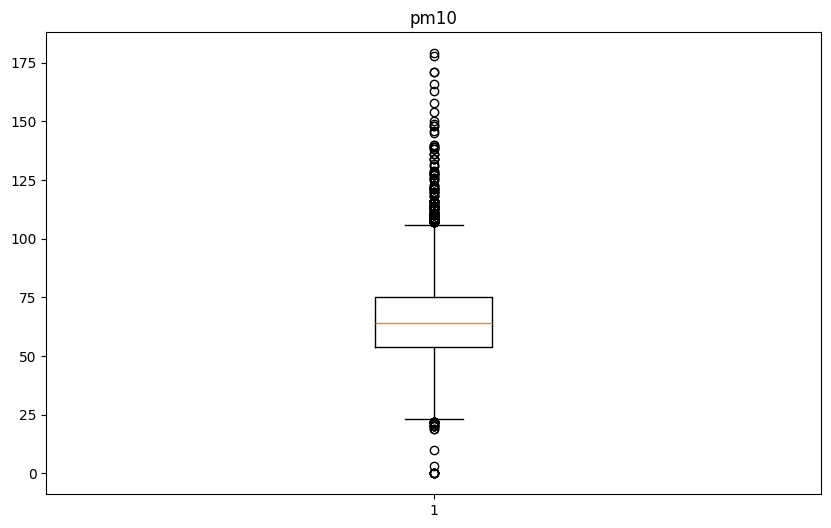

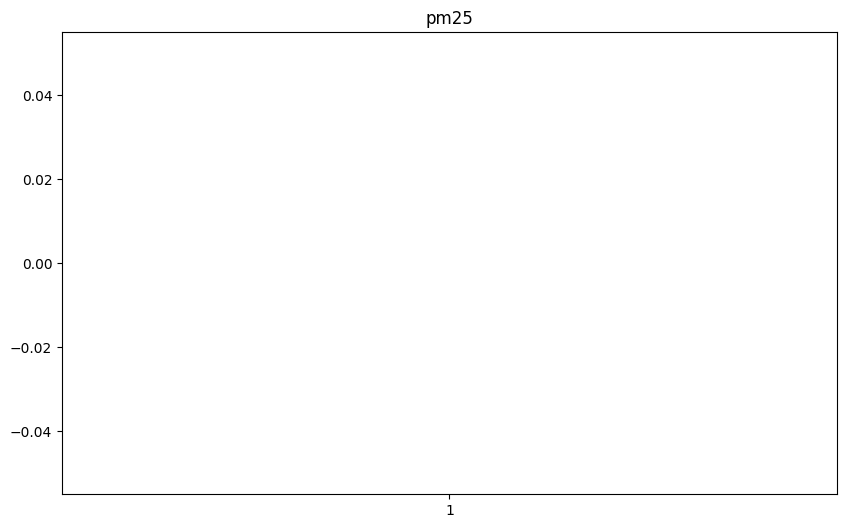

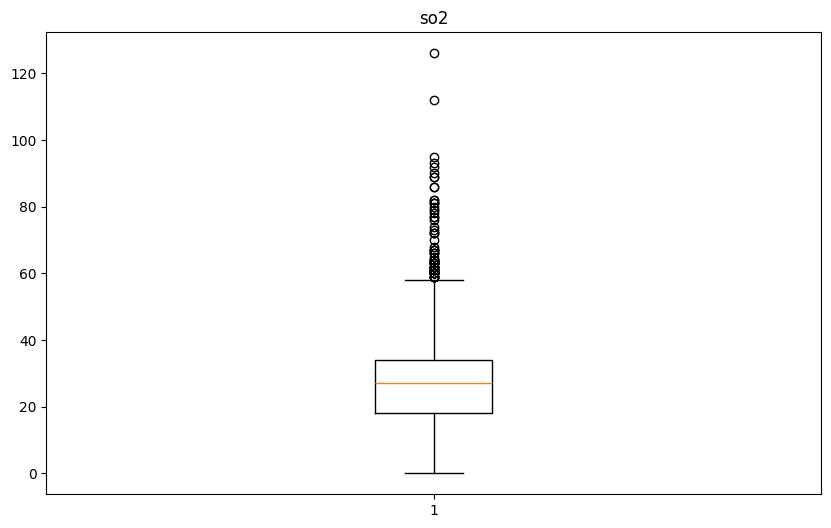

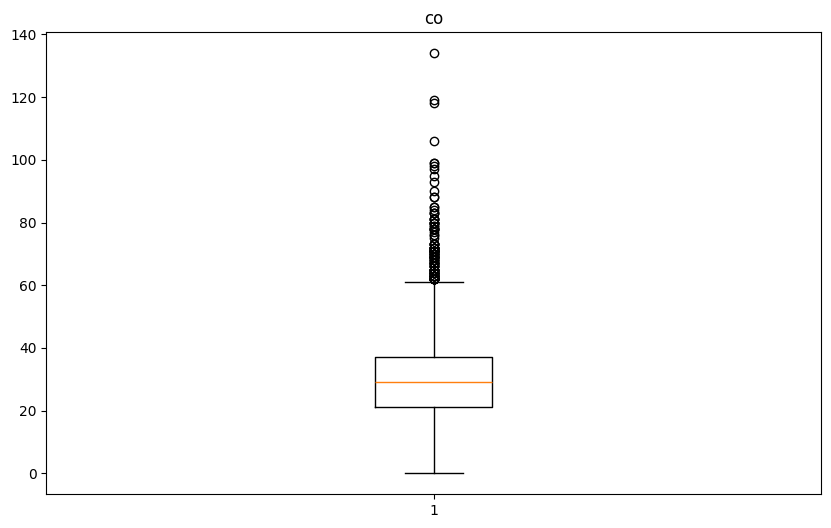

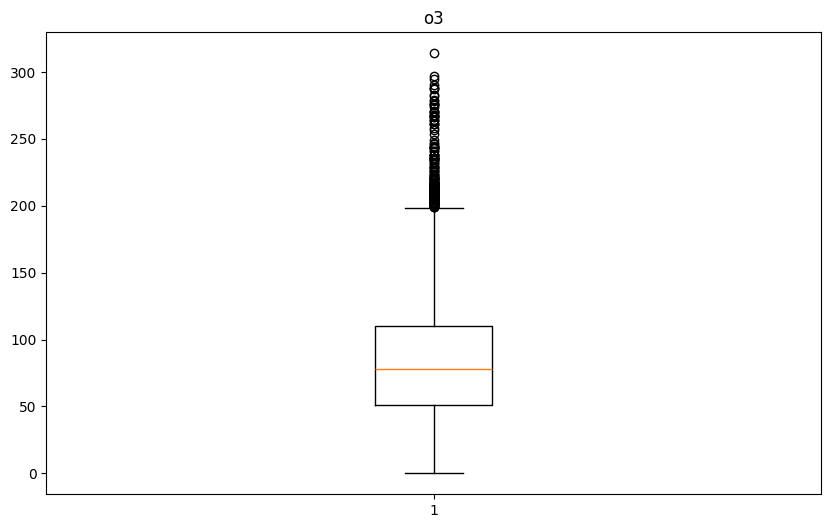

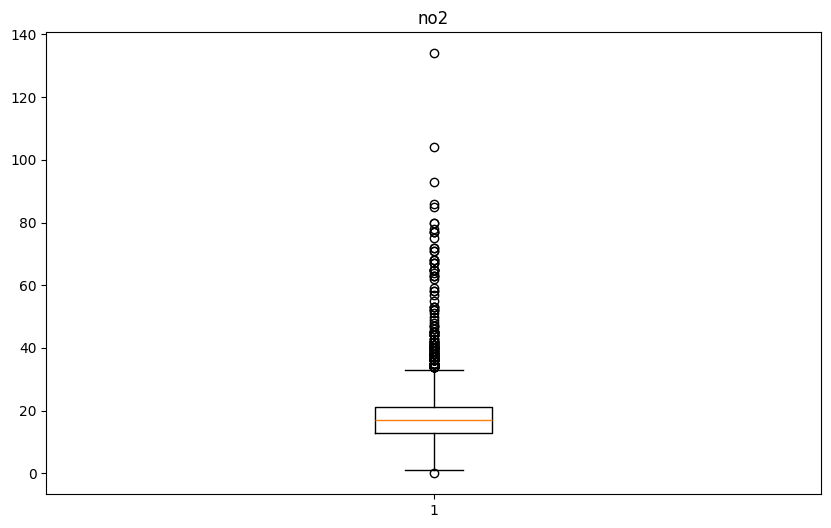

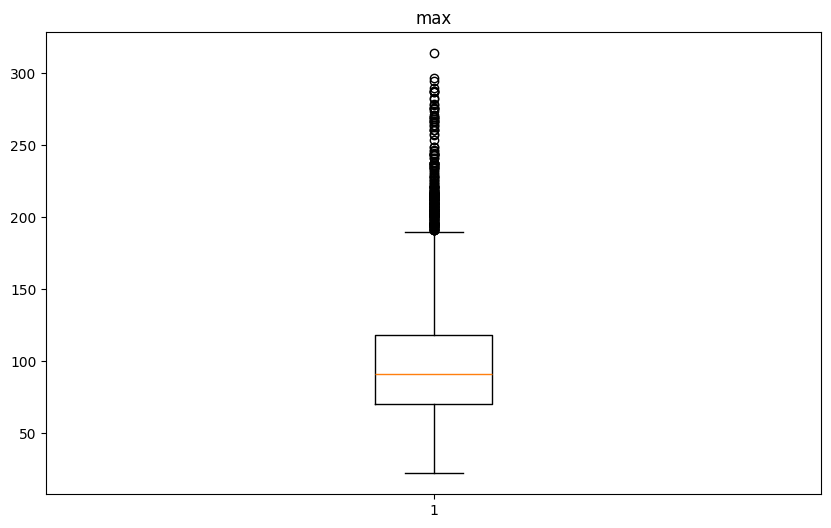

In [36]:
feature_numeric = all_df.select_dtypes(include='number').columns

for feature in feature_numeric:
    plt.figure(figsize=(10,6))
    plt.boxplot(x=all_df[feature])
    plt.title(feature)
    plt.show()

In [13]:
all_df['pm10'] = all_df['pm10'].fillna(all_df['pm10'].median())

In [17]:
all_df['so2'] = all_df['so2'].fillna(all_df['so2'].median())

In [19]:
all_df['co'] = all_df['co'].fillna(all_df['co'].median())

In [20]:
all_df['o3'] = all_df['o3'].fillna(all_df['o3'].median())

In [22]:
all_df['no2'] = all_df['no2'].fillna(all_df['no2'].median())

In [31]:
all_df = all_df[all_df['categori'] != 'TIDAK ADA DATA']

In [6]:
print(f'Data yang memiliki duplikat: {all_df.duplicated().sum()}')

Data yang memiliki duplikat: 0


In [9]:
all_df['critical'].unique()

array(['CO', 'O3', 'PM10', 'NO2', 'SO2', 'PM25', nan], dtype=object)

In [15]:
all_df.describe(include='all')

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
count,4626,4626,4626.000000,723.000000,4607.000000,4618.000000,4621.000000,4618.000000,4626.000000,4625,4626
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6
top,NaN,DKI4 (Lubang Buaya),NaN,NaN,NaN,NaN,NaN,NaN,NaN,O3,SEDANG
freq,NaN,1592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2884,2574
mean,2016-06-23 21:02:15.408560384,NaN,65.049287,94.374827,28.183851,30.263534,86.586670,18.120832,99.432123,NaN,NaN
min,2010-01-01 00:00:00,NaN,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2013-03-05 06:00:00,NaN,54.000000,76.000000,18.000000,21.000000,51.000000,13.000000,70.000000,NaN,NaN
50%,2016-05-04 12:00:00,NaN,64.000000,94.000000,27.000000,29.000000,78.000000,17.000000,91.000000,NaN,NaN
75%,2019-07-23 18:00:00,NaN,75.000000,111.000000,34.000000,37.000000,110.000000,21.000000,118.000000,NaN,NaN
max,2023-11-30 00:00:00,NaN,179.000000,287.000000,126.000000,134.000000,314.000000,134.000000,314.000000,NaN,NaN
